
ARIMA and Seasonal ARIMA
Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:

    Visualize the Time Series Data
    Make the time series data stationary
    Plot the Correlation and AutoCorrelation Charts
    Construct the ARIMA Model or Seasonal ARIMA based on the data
    Use the model to make predictions

Let's go through these steps!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("E:/time series/perrin-freres-monthly-champagne-.csv")
df.head(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.columns = ['months' , 'sales']

In [5]:
df

,months,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [6]:
df.drop(106, axis=0, inplace = True)


In [7]:
df.drop(105, axis=0, inplace = True)


In [8]:
df['months'] = pd.to_datetime(df['months'])
df.head(10)

,months,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
5,1964-06-01,3036.0
6,1964-07-01,2282.0
7,1964-08-01,2212.0
8,1964-09-01,2922.0
9,1964-10-01,4301.0


In [9]:
df.set_index('months', inplace= True)
plt.style.use('dark_background')

df['sales'] = round(df['sales'])

Text(0.5, 1.0, 'forcasting data')

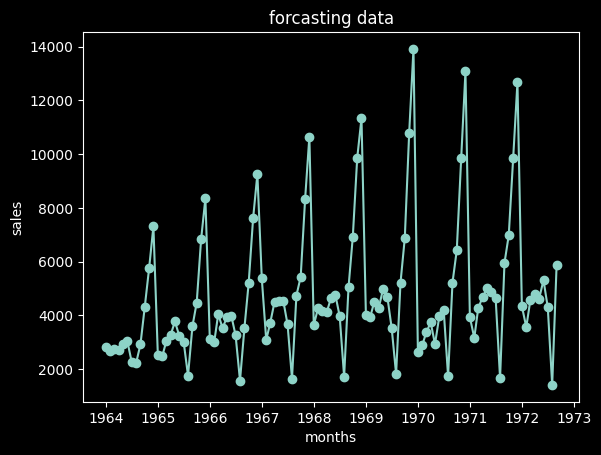

In [10]:
plt.plot(df,  marker = 'o')
plt.xlabel("months")
plt.ylabel("sales")
plt.title("forcasting data")


In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_results = adfuller(df['sales'])


In [13]:
test_results

(-1.8335930563276195,
 0.3639157716602467,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [14]:
def adfuller_test(sales):
    results = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags used', 'Number of observations used']
    for value,label in zip(results ,labels):
        print(label+" : "+str(value))
    if results[1] <= 0.05:
        print("strong evidence against null hypo")
    else:
        print("weak evidence against null hypo")    



In [15]:
adfuller_test(df['sales'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
#Lags used : 11
Number of observations used : 93
weak evidence against null hypo


## Differencing

In [17]:
df['sales first difference'] = df['sales'] - df['sales'].shift(1)

In [18]:
df['seasonal first difference'] = df['sales'] - df['sales'].shift(12)

In [21]:
df.head(14)

,sales,sales first difference,seasonal first difference
months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [22]:
adfuller_test(df['seasonal first difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags used : 0
Number of observations used : 92
strong evidence against null hypo


Text(0.5, 1.0, 'forcasting data')

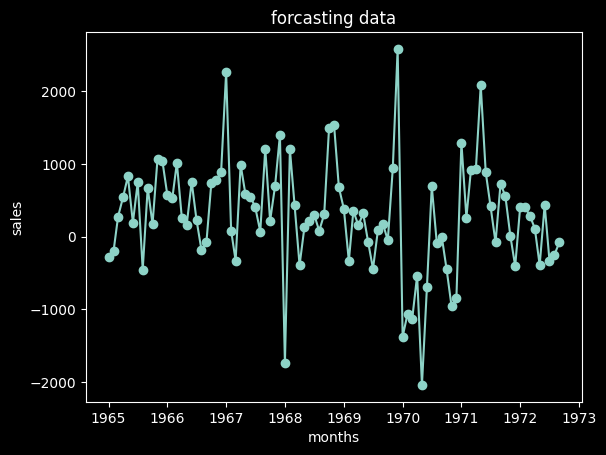

In [23]:
plt.plot(df['seasonal first difference'],  marker = 'o')
plt.xlabel("months")
plt.ylabel("sales")
plt.title("forcasting data")


#### now our data is stationary 

## Final thoughts on Autocorrelation and partial Autocorrelation


Final Thoughts on Autocorrelation and Partial Autocorrelation

    Identification of an AR model is often best done with the PACF.
        For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

    Identification of an MA model is often best done with the ACF rather than the PACF. p,d,q
        For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

    p AR model lags d differencing q MA lags




In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

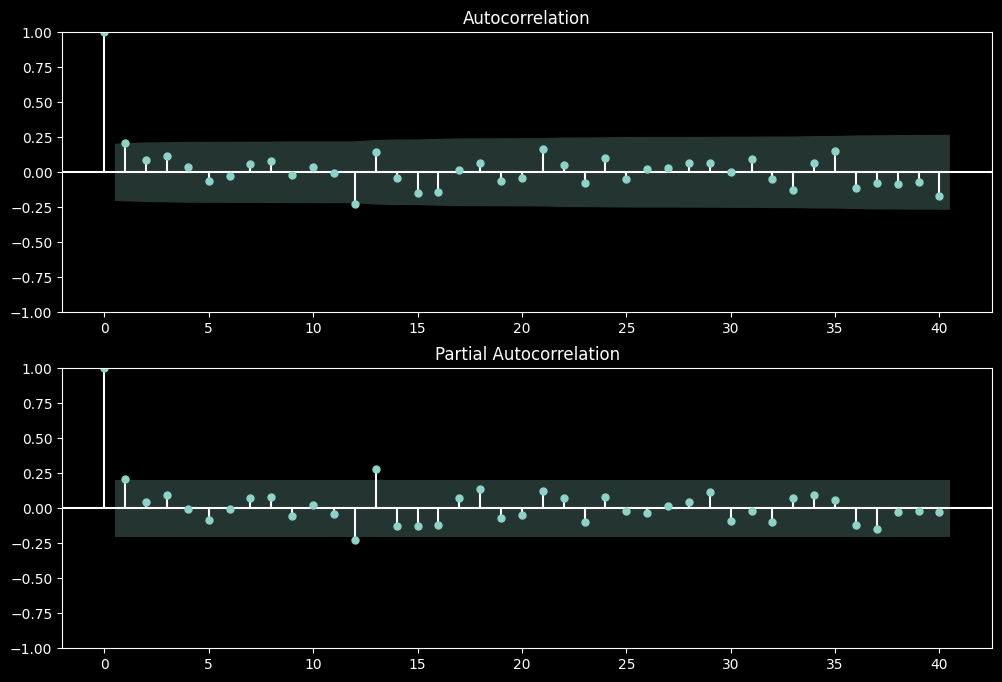

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['seasonal first difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['seasonal first difference'].iloc[13:],lags=40,ax=ax2)

In [31]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model with seasonal_order
model = SARIMAX(df['sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the SARIMA model
model_fit = model.fit()

e:\time series\ahmed\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
e:\time series\ahmed\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Sun, 03 Mar 2024   AIC                           1486.804
Time:                                    15:12:31   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='months'>

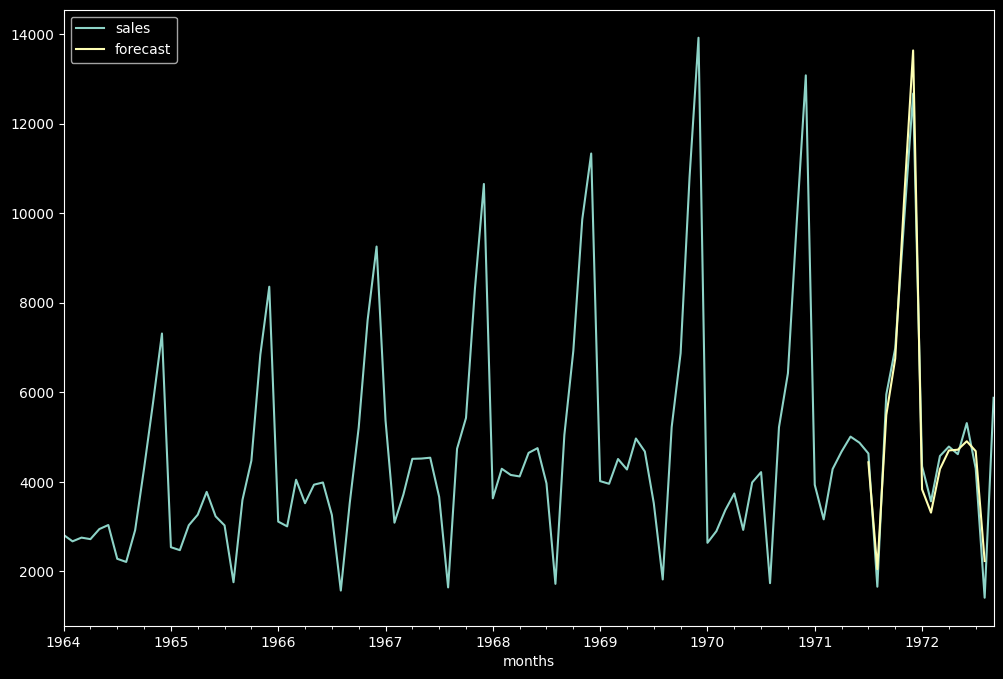

In [37]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [38]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [39]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [40]:
future_datest_df.tail()

,sales,sales first difference,seasonal first difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [41]:
future_df=pd.concat([df,future_datest_df])

C:\Users\acer\AppData\Local\Temp\ipykernel_14528\1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

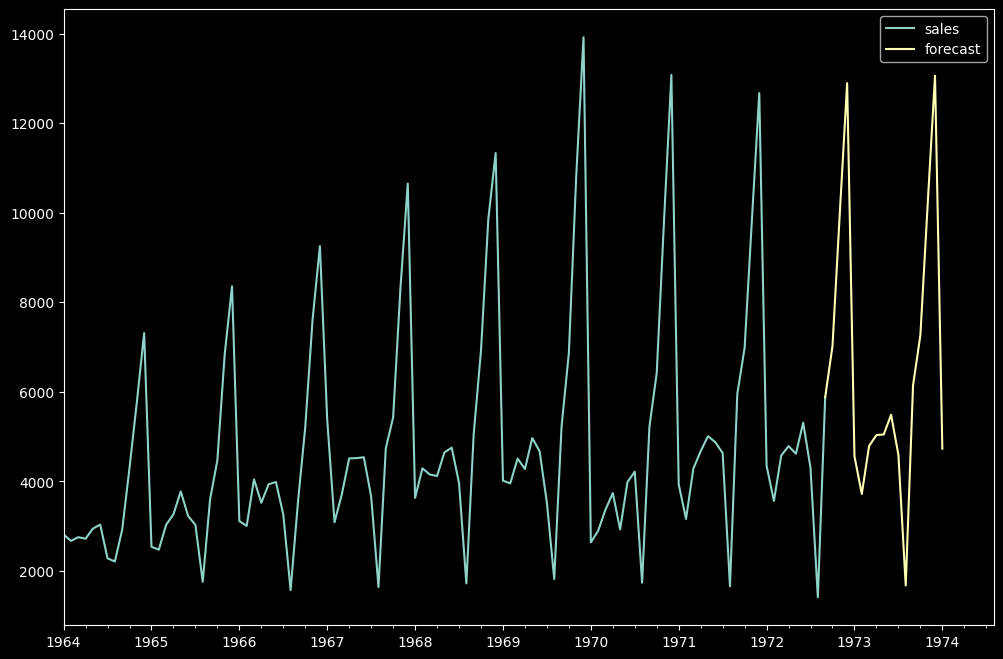

In [45]:
future_df['forecast'] = model_fit.predict(start = 104, end = 120, dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8)) 

##                                            Thank You